# Data Science and Business Analytics Internship
## GRIP @ The Sparks Foundation
### BY: Abheenav V. J



# TASK 3 - Exploratory Data Analysis
Performing Exploratory Data Analysis on the dataset "SampleSuperstore", weak areas can be located and as business managers these areas can be rectified to generate higher profits.

# Import the Important Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

#pip install plotly
import plotly
import plotly.express as px
import plotly.offline as pyo
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df=pd.read_csv(r'SampleSuperstore.csv')
print("Showing part of the whole dataset:")
df.head(10)

Showing part of the whole dataset:


Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   
7  Standard Class   Consumer  United States      Los Angeles  California   
8  Standard Class   Consumer  United States      Los Angeles  California   
9  Standard Class   Consumer  United States      Los Angeles  California   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   
5        90032   West        Furniture  Furnishings   48.8600         7   
6        90032   West  Office Supplies          Art    7.2800         4   
7        90032   West       Technology       Phones  907.1520         6   
8        90032   West  Office Supplies      Binders   18.5040         3   
9        90032   West  Office Supplies   Appliances  114.9000         5   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  
5      0.00   14.1694  
6      0.00    1.9656  
7      0.20   90.7152  
8      0.20    5.7825  
9      0.00   34.4700

In [5]:
df.tail(10)

Ship Mode    Segment        Country         City       State  \
9984  Standard Class   Consumer  United States   Long Beach    New York   
9985  Standard Class   Consumer  United States   Long Beach    New York   
9986  Standard Class   Consumer  United States  Los Angeles  California   
9987  Standard Class  Corporate  United States       Athens     Georgia   
9988  Standard Class  Corporate  United States       Athens     Georgia   
9989    Second Class   Consumer  United States        Miami     Florida   
9990  Standard Class   Consumer  United States   Costa Mesa  California   
9991  Standard Class   Consumer  United States   Costa Mesa  California   
9992  Standard Class   Consumer  United States   Costa Mesa  California   
9993    Second Class   Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9984        11561   East  Office Supplies       Labels   31.500        10   
9985        11561   East  Office Supplies     Supplies   55.600         4   
9986        90008   West       Technology  Accessories   36.240         1   
9987        30605  South       Technology  Accessories   79.990         1   
9988        30605  South       Technology       Phones  206.100         5   
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9984       0.0  15.1200  
9985       0.0  16.1240  
9986       0.0  15.2208  
9987       0.0  28.7964  
9988       0.0  55.6470  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

# Common Dataset Exploration

In [6]:
# Checking for shape
df.shape

(9994, 13)

In [7]:
# Checking for any duplicate values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Checking common information for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [10]:
# CHecking for column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

It can be seen there are words that quite similar, such as 'Country' and 'Region'.

# Cleaning the Data

In [11]:
df = df.drop(["Country"] , axis = 1)

# Checking Null Counts

In [12]:
pd.DataFrame(df.isnull().sum(),columns=['Number of missing values'])

Number of missing values
Ship Mode                            0
Segment                              0
City                                 0
State                                0
Postal Code                          0
Region                               0
Category                             0
Sub-Category                         0
Sales                                0
Quantity                             0
Discount                             0
Profit                               0

Missing value is not found.

In [13]:
df.duplicated()
df.head(10)

Ship Mode    Segment             City       State  Postal Code Region  \
0    Second Class   Consumer        Henderson    Kentucky        42420  South   
1    Second Class   Consumer        Henderson    Kentucky        42420  South   
2    Second Class  Corporate      Los Angeles  California        90036   West   
3  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   
4  Standard Class   Consumer  Fort Lauderdale     Florida        33311  South   
5  Standard Class   Consumer      Los Angeles  California        90032   West   
6  Standard Class   Consumer      Los Angeles  California        90032   West   
7  Standard Class   Consumer      Los Angeles  California        90032   West   
8  Standard Class   Consumer      Los Angeles  California        90032   West   
9  Standard Class   Consumer      Los Angeles  California        90032   West   

          Category Sub-Category     Sales  Quantity  Discount    Profit  
0        Furniture    Bookcases  261.9600         2      0.00   41.9136  
1        Furniture       Chairs  731.9400         3      0.00  219.5820  
2  Office Supplies       Labels   14.6200         2      0.00    6.8714  
3        Furniture       Tables  957.5775         5      0.45 -383.0310  
4  Office Supplies      Storage   22.3680         2      0.20    2.5164  
5        Furniture  Furnishings   48.8600         7      0.00   14.1694  
6  Office Supplies          Art    7.2800         4      0.00    1.9656  
7       Technology       Phones  907.1520         6      0.20   90.7152  
8  Office Supplies      Binders   18.5040         3      0.20    5.7825  
9  Office Supplies   Appliances  114.9000         5      0.00   34.4700

In [14]:
df.duplicated().sum()

17

In [15]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Take a look at the discrete variables using .unique():

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [17]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [18]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [19]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [20]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [21]:
data=df.drop_duplicates(keep='first')
dt=df.sort_values(by='Profit',ascending=False)
dt.head(10)

Ship Mode      Segment           City         State  Postal Code  \
6826  Standard Class    Corporate      Lafayette       Indiana        47905   
8153     First Class     Consumer        Seattle    Washington        98115   
4190  Standard Class     Consumer         Newark      Delaware        19711   
9039  Standard Class     Consumer        Detroit      Michigan        48205   
4098  Standard Class     Consumer    Minneapolis     Minnesota        55407   
2623     First Class  Home Office  New York City      New York        10024   
509   Standard Class     Consumer        Atlanta       Georgia        30318   
8488    Second Class     Consumer      Arlington      Virginia        22204   
7666  Standard Class  Home Office     Providence  Rhode Island         2908   
6520    Second Class     Consumer        Jackson      Michigan        49201   

       Region         Category Sub-Category      Sales  Quantity  Discount  \
6826  Central       Technology      Copiers  17499.950         5       0.0   
8153     West       Technology      Copiers  13999.960         4       0.0   
4190     East       Technology      Copiers  10499.970         3       0.0   
9039  Central  Office Supplies      Binders   9892.740        13       0.0   
4098  Central  Office Supplies      Binders   9449.950         5       0.0   
2623     East       Technology      Copiers  11199.968         4       0.2   
509     South  Office Supplies      Binders   6354.950         5       0.0   
8488    South       Technology     Machines   8749.950         5       0.0   
7666     East       Technology      Copiers   5399.910         9       0.0   
6520  Central  Office Supplies      Binders   5443.960         4       0.0   

         Profit  
6826  8399.9760  
8153  6719.9808  
4190  5039.9856  
9039  4946.3700  
4098  4630.4755  
2623  3919.9888  
509   3177.4750  
8488  2799.9840  
7666  2591.9568  
6520  2504.2216

In [22]:
dt.shape

(9994, 12)

# dt Correlation Matrix

In [23]:
dt.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

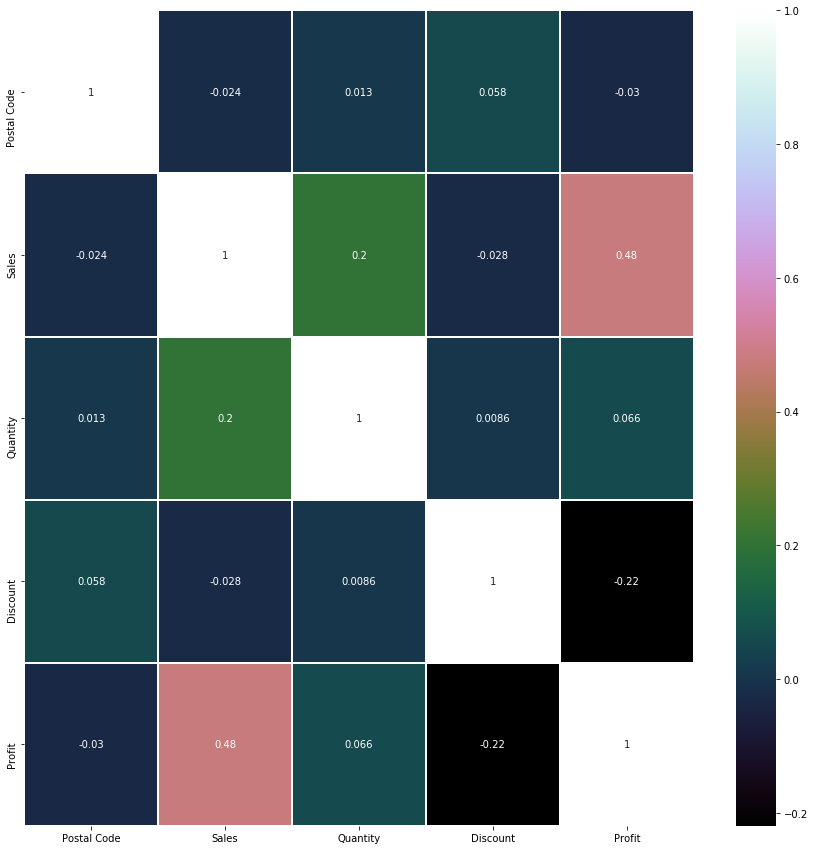

In [24]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(dt.corr(),annot=True,cmap="cubehelix",linewidths=1)

# Visualization

In [25]:
fig=px.bar(dt,x='Region',y='Sales',title="Sales per Region")
fig.show()

# Distribution Plots

In [26]:
dt['z-score']=(dt.Sales-dt.Sales.mean())/dt.Sales.std()

In [27]:
dt_no_outliers=dt[dt['z-score']<3]

In [28]:
new_dt = dt_no_outliers
new_dt.shape

(9867, 13)

Sales:


Text(0.5, 1.0, 'Sales Distribution')

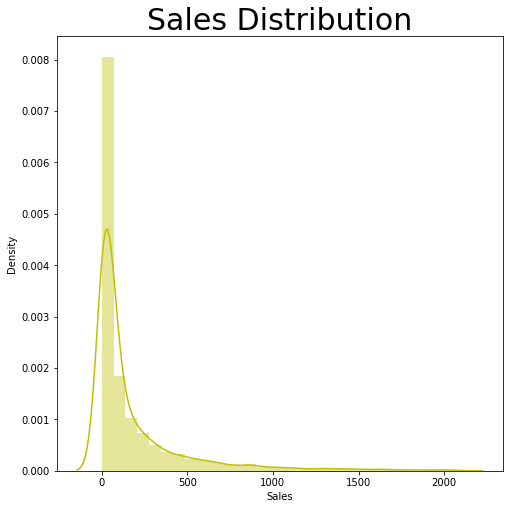

In [29]:
fig=plt.subplots(figsize=(8,8))
print("Sales:")
sns.distplot(new_dt['Sales'], kde=True, bins=30, color="y")
plt.title('Sales Distribution',fontsize=30)

Discount:


Text(0.5, 1.0, 'Discount Distribution')

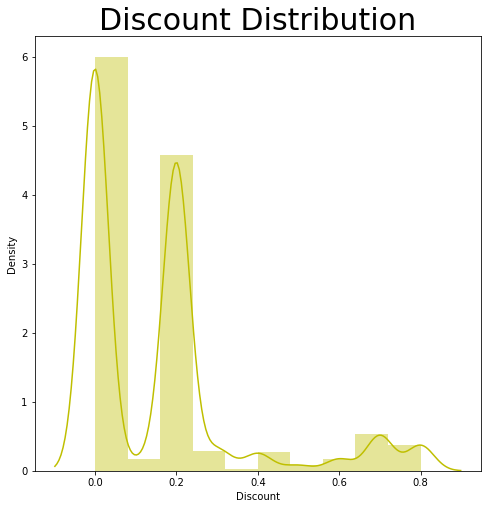

In [30]:
fig=plt.subplots(figsize=(8,8))
print("Discount:")
sns.distplot(new_dt['Discount'], kde=True, bins=10, color="y")
plt.title('Discount Distribution',fontsize=30)

Profit:


Text(0.5, 1.0, 'Profit Distribution')

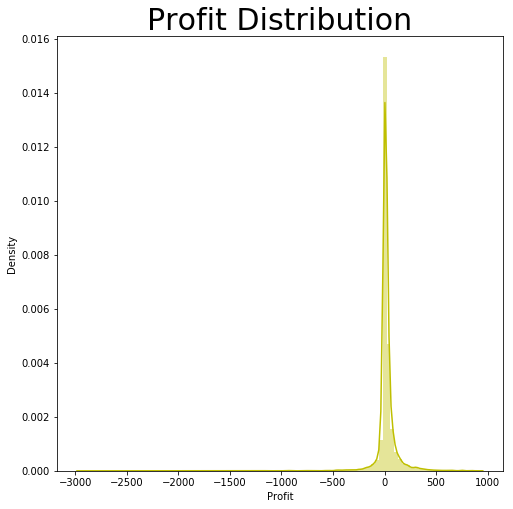

In [31]:
fig=plt.subplots(figsize=(8,8))
print("Profit:")
sns.distplot(new_dt['Profit'], kde=True, bins=100, color="y")
plt.title('Profit Distribution',fontsize=30)

Quantity:


Text(0.5, 1.0, 'Quantity Distribution')

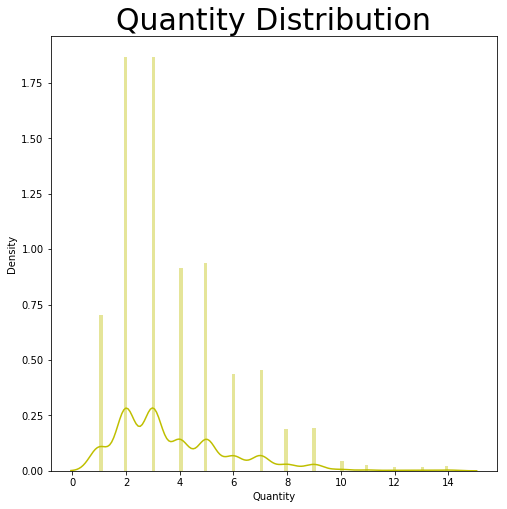

In [32]:
fig=plt.subplots(figsize=(8,8))
print("Quantity:")
sns.distplot(new_dt['Quantity'], kde=True, bins=100, color="y")
plt.title('Quantity Distribution',fontsize=30)

# new_dt Correlation Matrix

In [33]:
new_dt = new_dt.drop(['z-score','Postal Code'],axis=1)
new_dt.corr()

Sales  Quantity  Discount    Profit
Sales     1.000000  0.255552 -0.041876  0.271660
Quantity  0.255552  1.000000  0.010904  0.076426
Discount -0.041876  0.010904  1.000000 -0.355820
Profit    0.271660  0.076426 -0.355820  1.000000

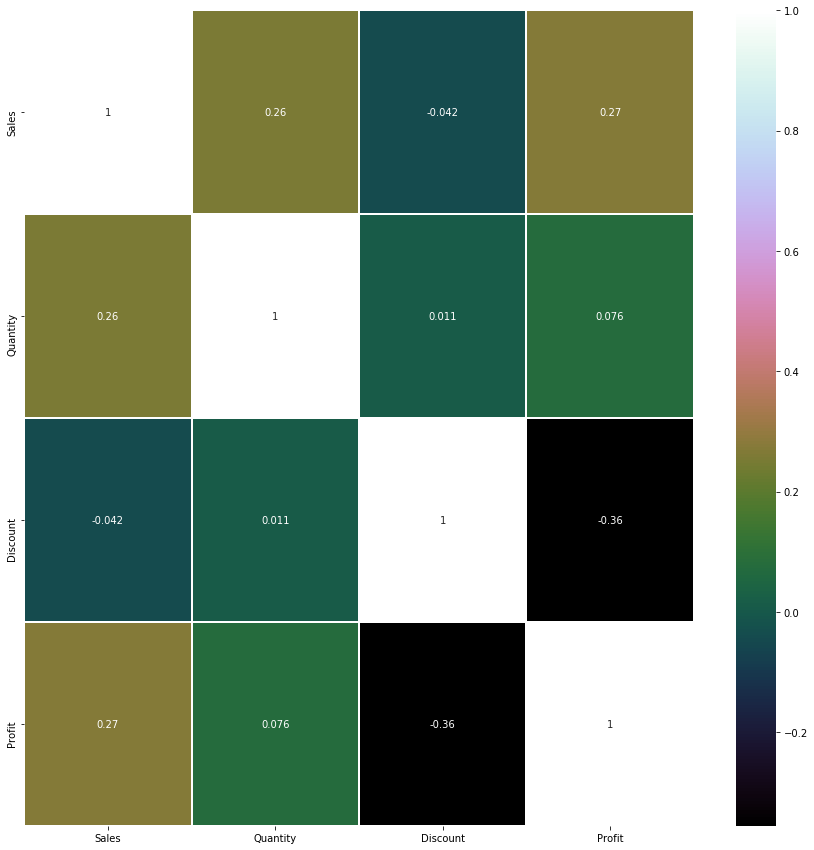

In [34]:
fig=plt.subplots(figsize=(15,15))
sns.heatmap(new_dt.corr(),annot=True,cmap="cubehelix",linewidth=1)

- Discount and Profit are Negatively Correlated
- Sales and Profit are Moderately Correlated

# Visualization

# Count Plots of each Column

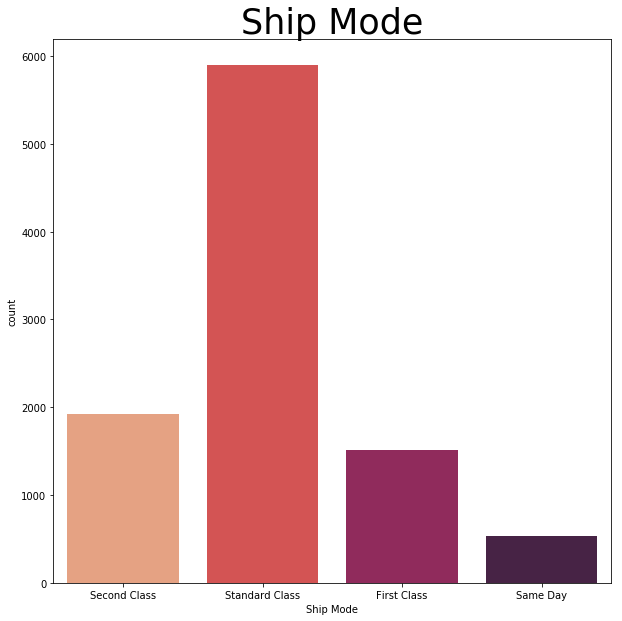

In [35]:
# Ship mode
plt.figure(figsize=(10,10))
sns.countplot(x=new_dt["Ship Mode"], palette='rocket_r')

plt.title('Ship Mode',fontsize=35)
plt.show()

- Standard Class is the most common with amount of almost 6000

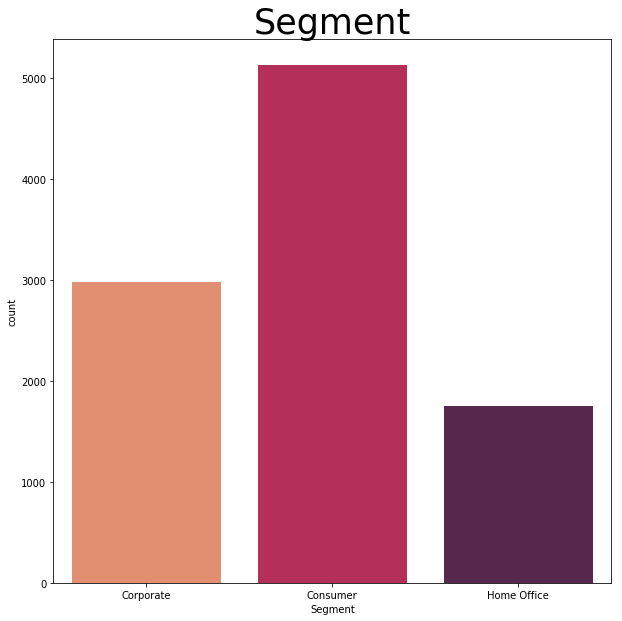

In [36]:
# Segment
plt.figure(figsize=(10,10))
sns.countplot(x=new_dt["Segment"], palette='rocket_r')

plt.title('Segment', fontsize=35)
plt.show()

- Consumer has the maximum amount

Showing part of the whole dataset:


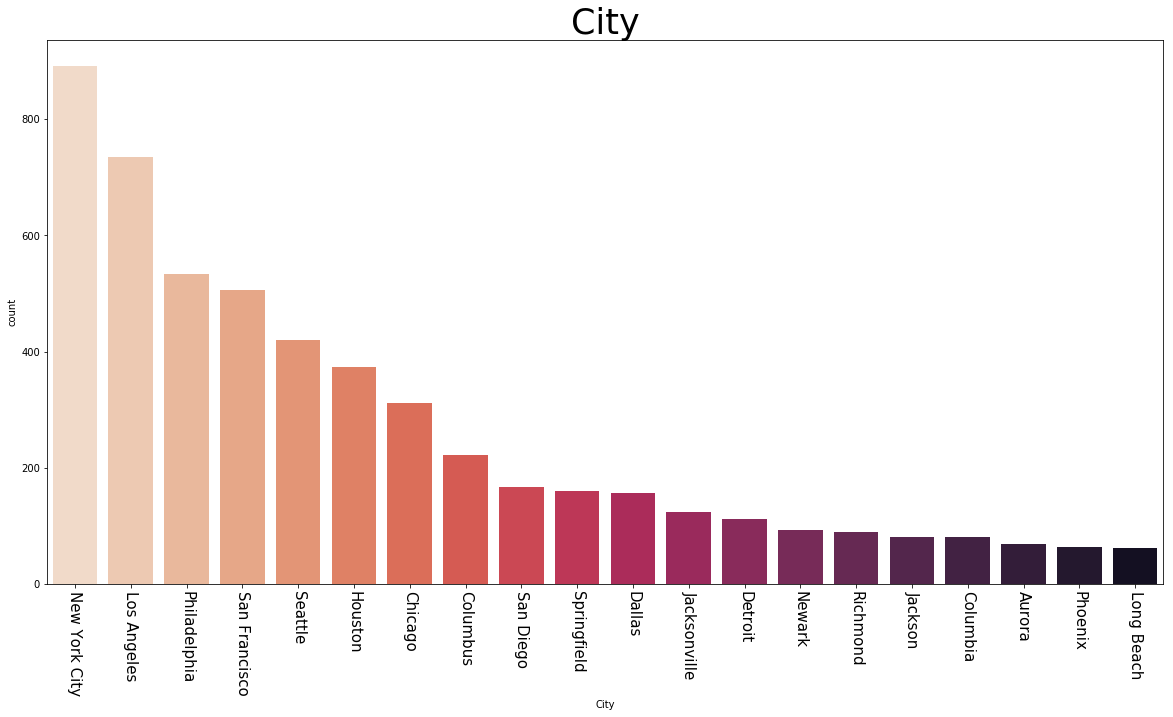

In [37]:
# City
plt.figure(figsize=(20,10))
sns.countplot(x=new_dt["City"],order=(data['City'].value_counts().head(20)).index, palette='rocket_r')

plt.title('City',fontsize=35)
plt.xticks(rotation=270,fontsize=15)

print("Showing part of the whole dataset:")
plt.show()

- New York has the highest amount among other cities, followed by Los Angeles, Philadephia, and so on

Showing part of the whole dataset:


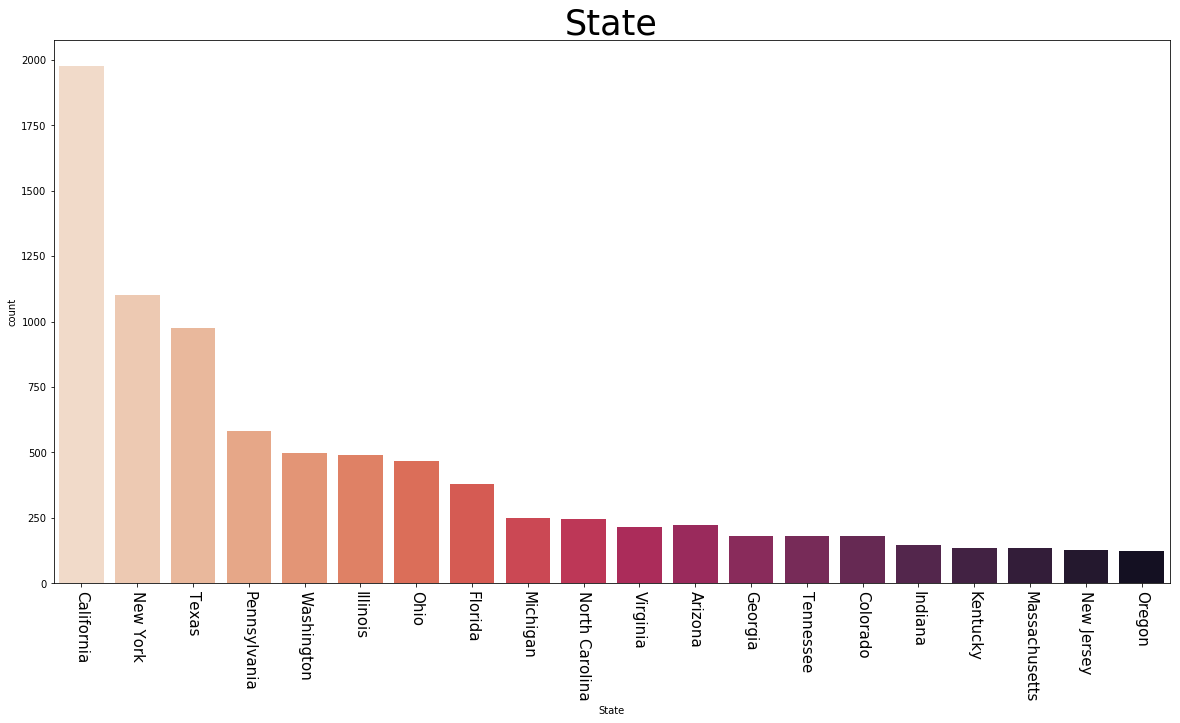

In [38]:
# State
plt.figure(figsize=(20,10))
sns.countplot(x=new_dt["State"],order=(data['State'].value_counts().head(20)).index,palette='rocket_r')

plt.title('State', fontsize=35)
plt.xticks(rotation = 270, fontsize=15)

print("Showing part of the whole dataset:")
plt.show()

- California has the highest amount than other States, followed by New York, Texas, and so on

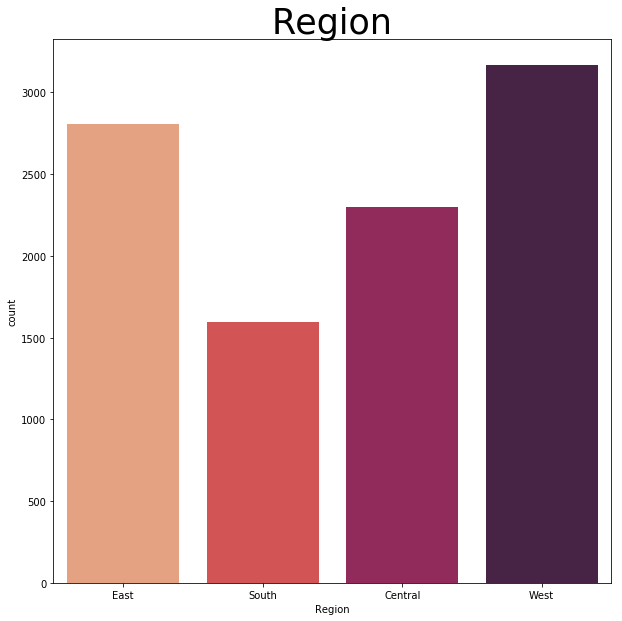

In [39]:
# Region
plt.figure(figsize=(10,10))
sns.countplot(x=new_dt["Region"], palette='rocket_r')

plt.title('Region',fontsize=35)
plt.show()

- In region, West has the maximum value

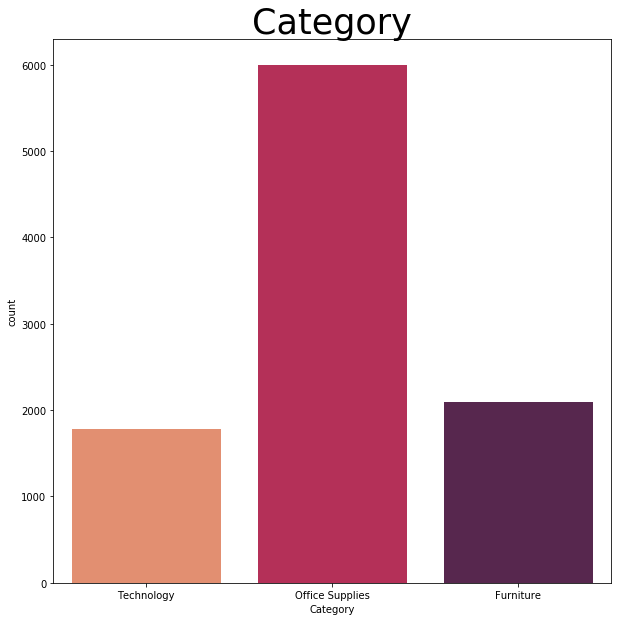

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x=new_dt["Category"], palette='rocket_r')

plt.title('Category',fontsize=35)
plt.show()

- Office Supplies has the highest amount than the other categories

Showing part of the whole dataset:


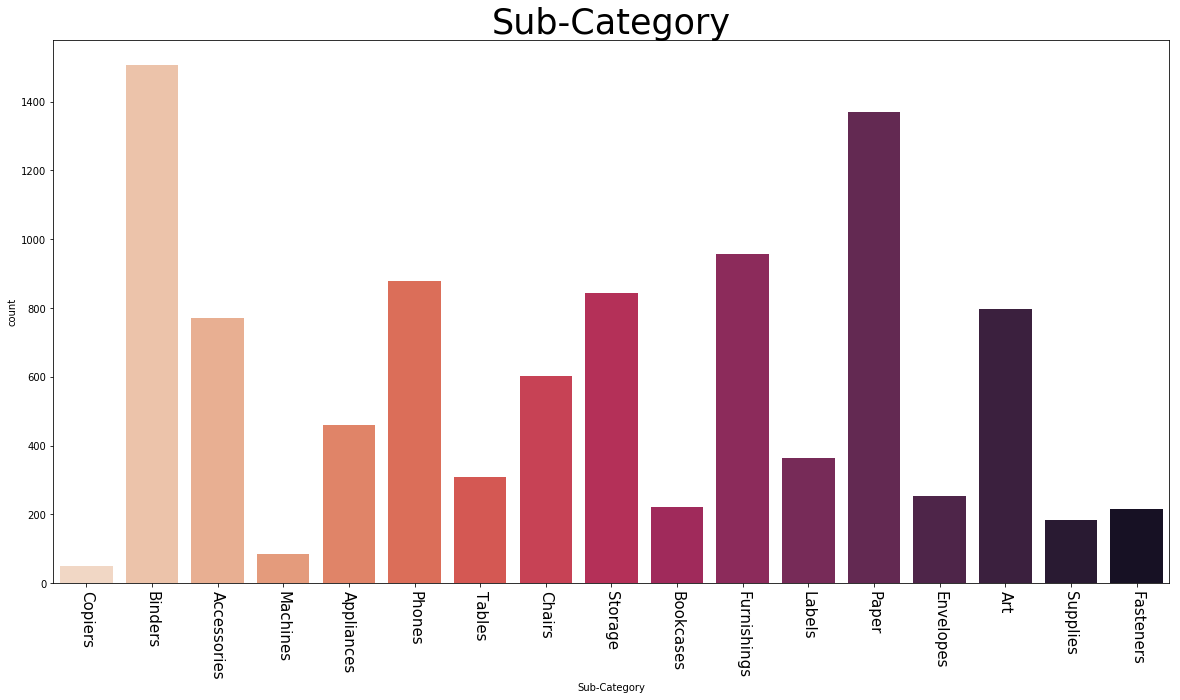

In [41]:
# State
plt.figure(figsize=(20,10))
sns.countplot(x=new_dt["Sub-Category"],palette='rocket_r')

plt.title('Sub-Category', fontsize=35)
plt.xticks(rotation = 270, fontsize=15)

print("Showing part of the whole dataset:")
plt.show()

- Highest amount of Sub-Category is Binder, followed by Paper

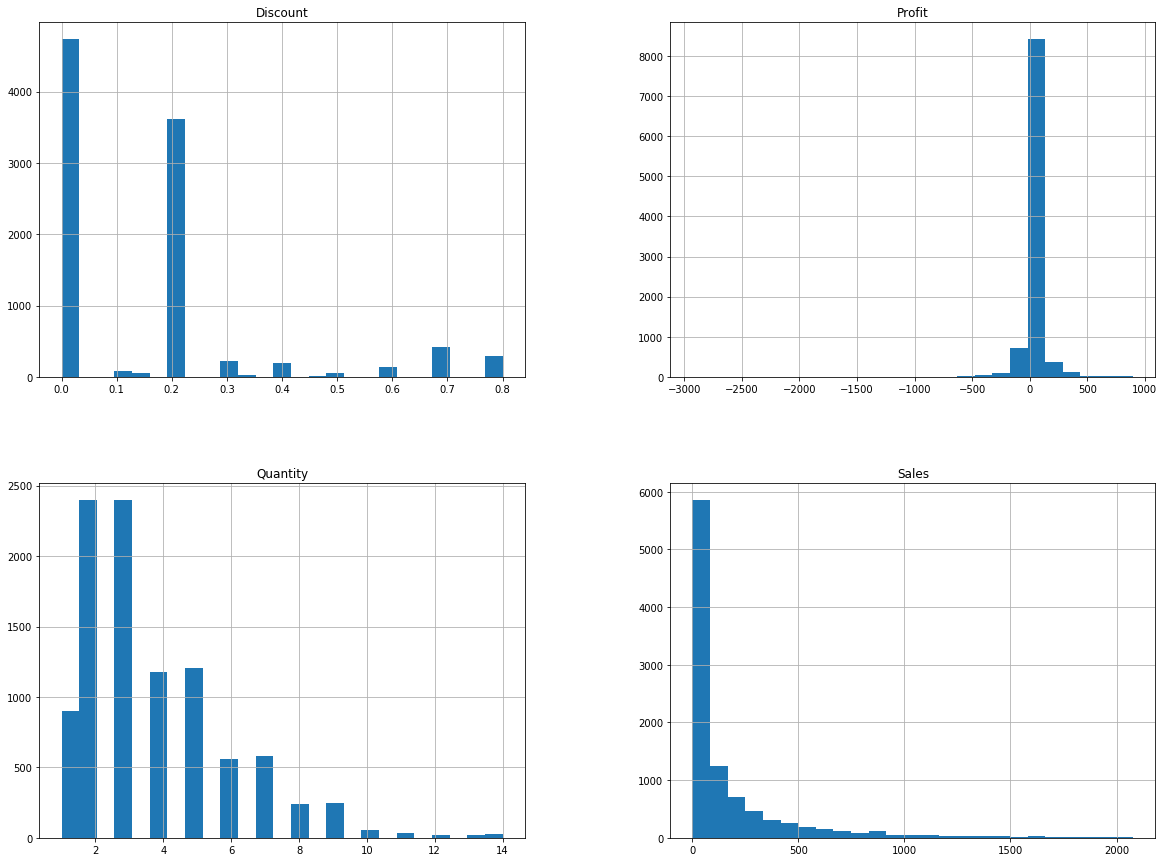

In [42]:
new_dt.hist(bins=25,figsize=(20,15))
plt.show()

# Pairplot for each Column

### Pairplot based on Category:

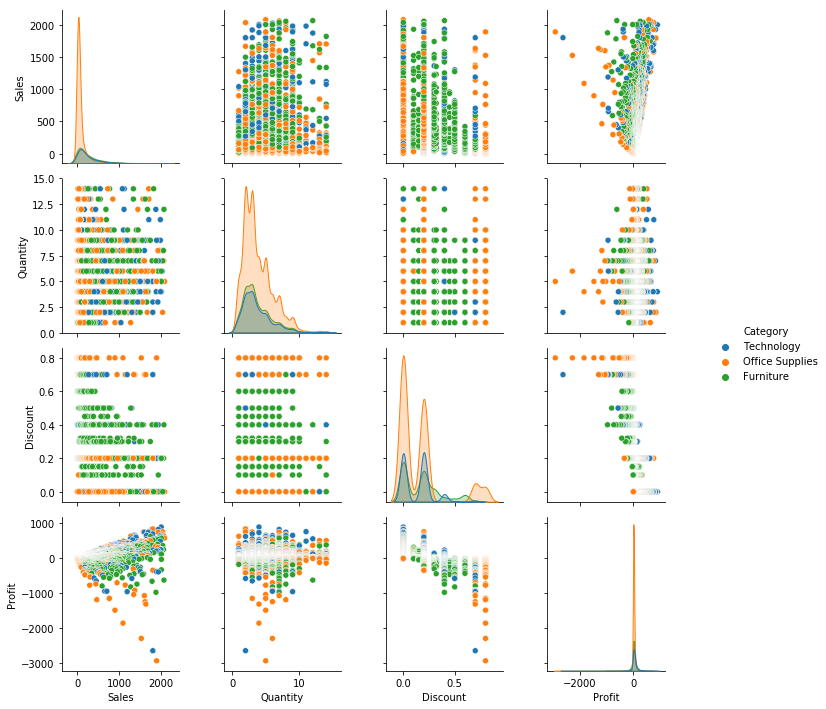

In [43]:
sns.pairplot(new_dt, hue='Category')

### Pairplot based on Region:

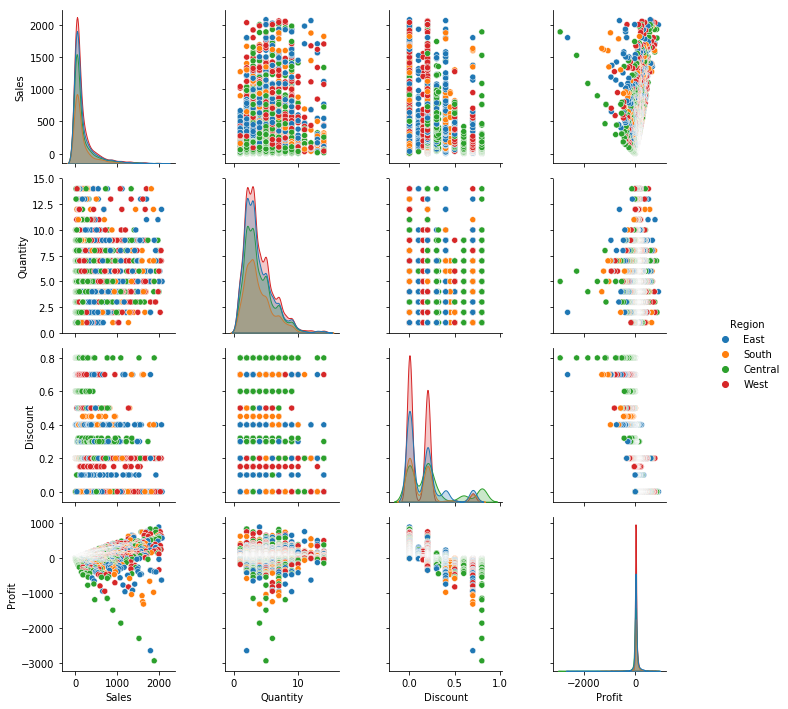

In [44]:
sns.pairplot(new_dt, hue='Region')

### Pairplot based on Segment:

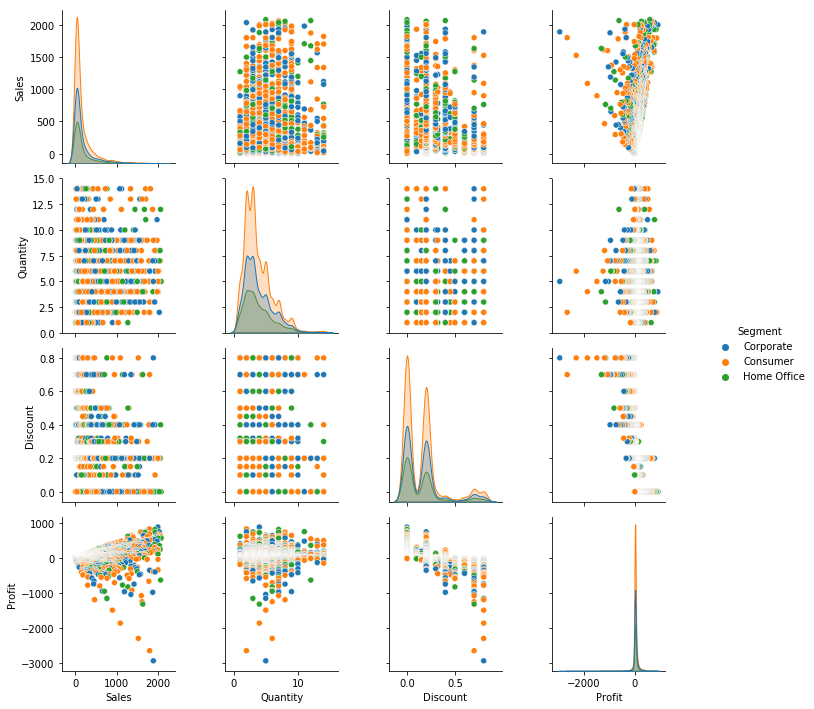

In [45]:
sns.pairplot(new_dt, hue='Segment')

### Pairplot based on Sub-Category:

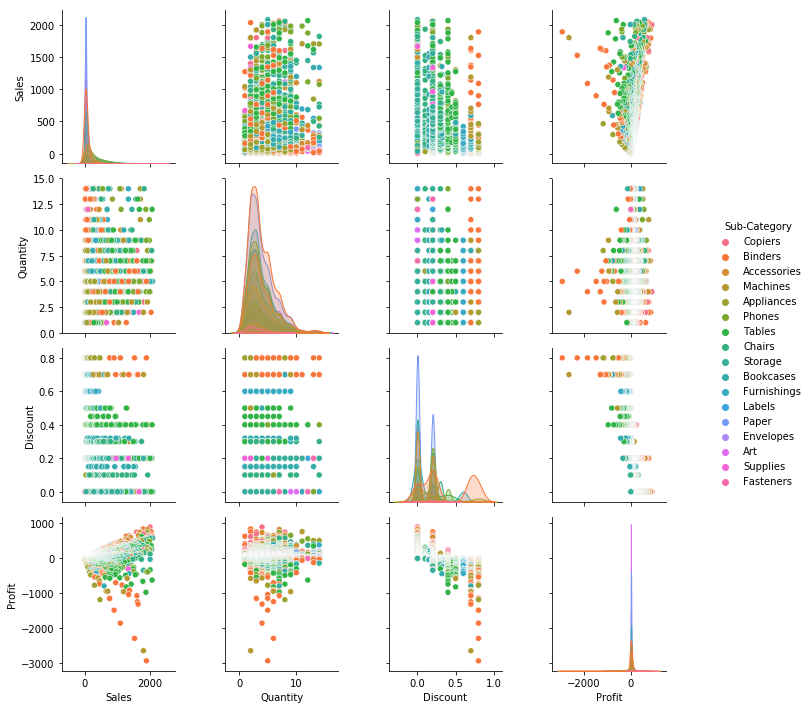

In [46]:
sns.pairplot(new_dt, hue='Sub-Category')

Text(0.5, 1.0, 'Sales per Category and Sub-Category')

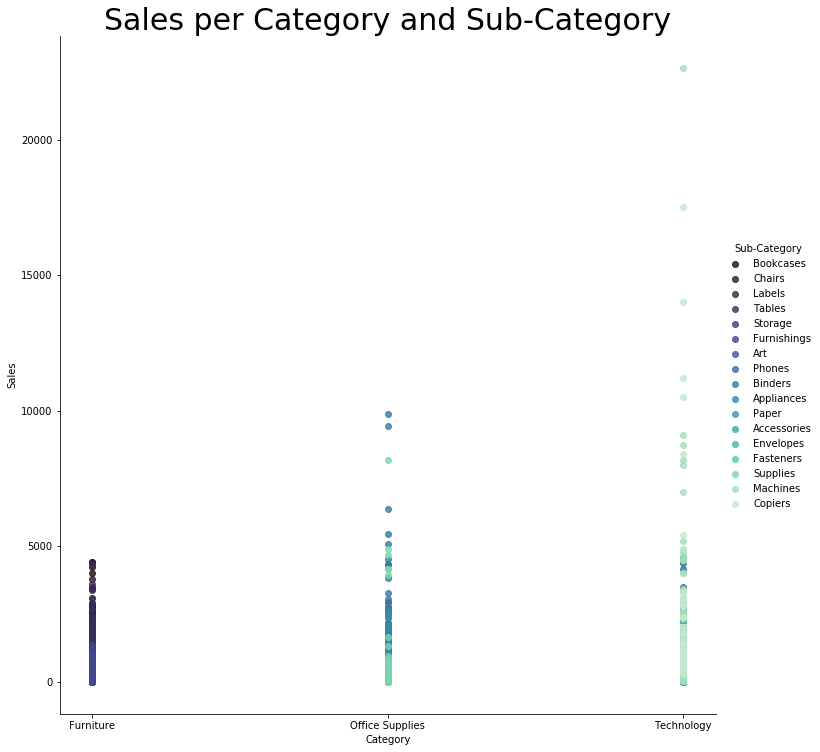

In [47]:
sns.lmplot(x='Category',y='Sales',data=df,fit_reg=False,hue='Sub-Category',legend=True,palette='mako',size=10)
plt.title("Sales per Category and Sub-Category",fontsize=30)

- Technology has the highest amount of sales

In [48]:
# Calculation information of each states of Profit
new_dt.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

sum        mean        min       max  count  \
State                                                                      
Alabama                4327.6253   72.127088     0.0000  527.9840     60   
Arizona               -3427.9246  -15.303235  -814.4832  211.4955    224   
Arkansas               4008.6871   66.811452     1.4190  843.1706     60   
California            63533.4489   32.136292  -325.5720  682.5168   1977   
Colorado              -3127.8779  -17.281093  -938.2800  247.9960    181   
Connecticut            3511.4918   42.823071   -15.5826  294.6710     82   
Delaware               4145.1201   44.097022   -48.7839  390.9770     94   
District of Columbia   1059.5893  105.958930     4.4344  648.5624     10   
Florida               -1915.8155   -5.041620 -1031.5385  311.9948    380   
Georgia                9603.4546   53.352526     0.1134  635.4950    180   
Idaho                   826.7231   39.367767     1.1151  259.5297     21   
Illinois             -13824.8685  -28.214017 -2929.4845  485.9892    490   
Indiana                8948.1397   61.288628     0.0000  545.1884    146   
Iowa                   1183.8119   39.460397     2.5920  394.2680     30   
Kansas                  836.4435   34.851813     1.7280  149.3820     24   
Kentucky               8519.0095   62.639776     0.0000  757.4112    136   
Louisiana              2196.1023   52.288150     1.8672  346.0396     42   
Maine                   454.4862   56.810775     3.8822  131.3550      8   
Maryland               5760.1888   55.386431   -47.1798  473.6106    104   
Massachusetts          6785.5016   50.262975  -297.6848  503.7822    135   
Michigan              13725.1350   54.900540     0.0000  829.3754    250   
Minnesota              5422.3599   62.325976     0.0000  843.1706     87   
Mississippi            2784.1634   53.541604     0.0000  257.9871     52   
Missouri               4049.9624   63.280662     2.2990  757.4112     64   
Montana                 453.3515   32.382250     2.2098  152.4950     14   
Nebraska               1293.1062   34.948816     0.2016  387.5676     37   
Nevada                 1492.7446   40.344449  -109.5822  320.3172     37   
New Hampshire          1189.0235   45.731673  -105.3164  315.8118     26   
New Jersey             5920.6300   46.989127   -31.3722  843.1706    126   
New Mexico             1157.1161   31.273408    -5.6943  138.3552     37   
New York              42593.5349   38.686226  -553.6476  767.2005   1101   
North Carolina         -843.6148   -3.429328 -1306.5504  303.8040    246   
North Dakota            230.1497   32.878529     0.8680  162.0948      7   
Ohio                 -10371.3986  -22.161108 -2639.9912  607.6080    468   
Oklahoma               4853.9560   73.544788     0.5520  523.7052     66   
Oregon                -1190.4705   -9.600569  -384.7164  228.0792    124   
Pennsylvania         -13334.6823  -22.872525  -913.1760  312.6760    583   
Rhode Island           4693.6725   85.339500  -127.5792  899.9820     55   
South Carolina         1769.0566   42.120395     0.5584  422.5100     42   
South Dakota            394.8283   32.902358     1.3068  132.5898     12   
Tennessee             -4562.9036  -25.209412 -1237.8462  190.4298    181   
Texas                -19021.8120  -19.469613 -2287.7820  624.9875    977   
Utah                   2546.5335   48.047802     0.2016  449.9850     53   
Vermont                1231.8513  123.185130     0.9588  406.7154     10   
Virginia              11953.0944   55.083384     0.0000  751.9624    217   
Washington            21587.8743   43.436367   -73.0548  762.5940    497   
West Virginia           185.9216   46.480400   -76.9536  219.4416      4   
Wisconsin              7727.9188   70.898338     0.2598  585.5520    109   
Wyoming                 100.1960  100.196000   100.1960  100.1960      1   

                         median         std           var  
State                                                      
Alabama                16.21350 

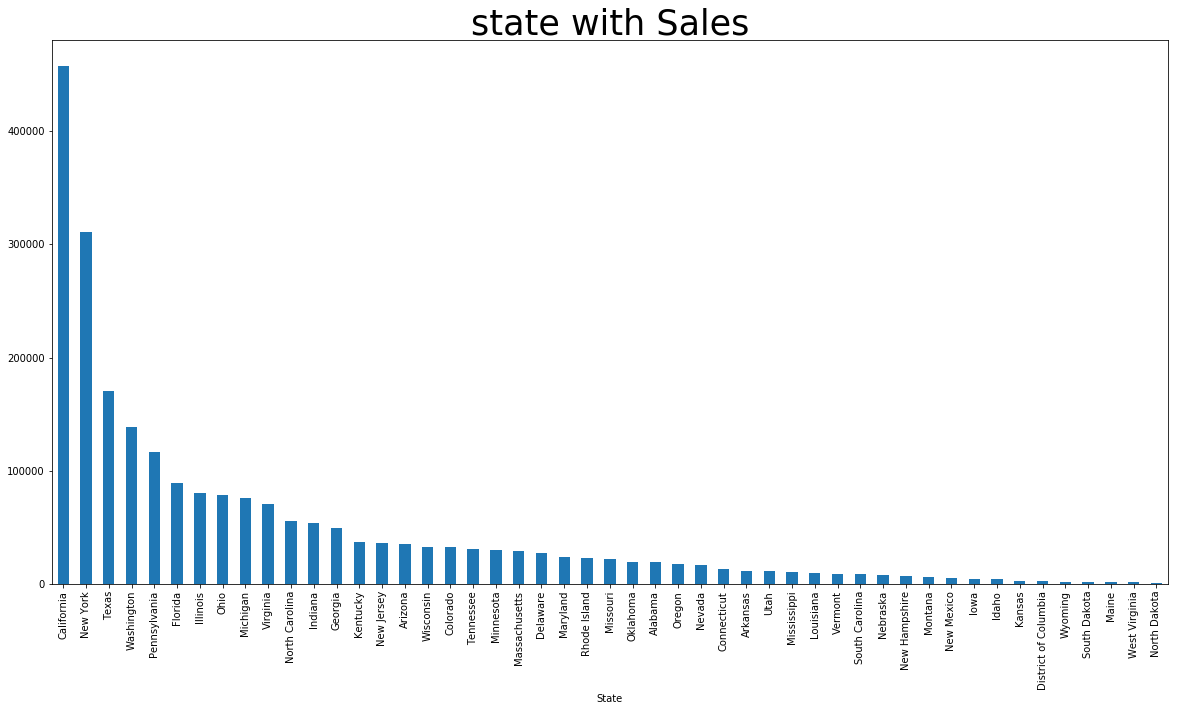

In [49]:
# statewise graph plot
state=df.groupby(['State'])['Sales'].sum()
state.sort_values(ascending=False,inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title('state with Sales',fontsize=35)

state.plot.bar()

- California has the highest sales

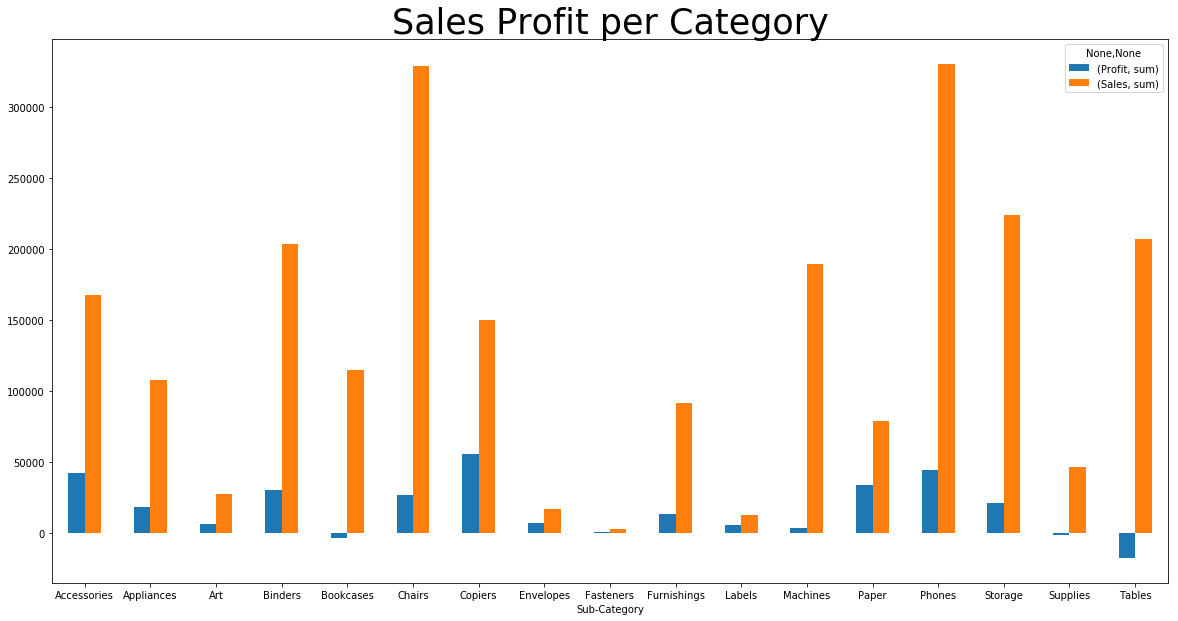

In [50]:
#statewise graph plot
sales_profit=df.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
sales_profit.plot.bar(rot=0,figsize=(20,10))

plt.title('Sales Profit per Category',fontsize=35)
plt.show(block=True)

- Copier has the highest amount of profit and chair has the highest amount of sale

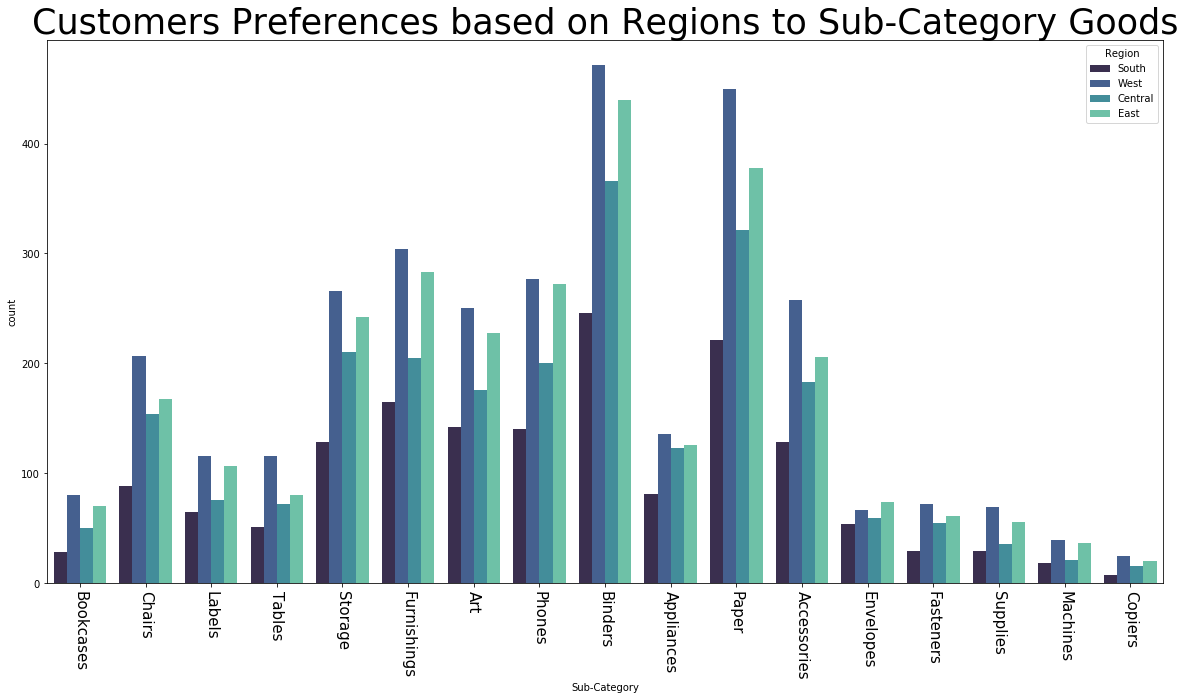

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='mako')

plt.title('Customers Preferences based on Regions to Sub-Category Goods',fontsize=35)
plt.xticks(rotation=270,fontsize=15)

plt.show()

# Conclusion

- Technology has the highest sales among other categories
- State with the highest amount of sales is California followed by New York, Texas, and so on
- Copier has maximum amount of profit and chair has the maximum amount of sales
- Customer from West Region is the most common to have preference to particular goods than other regions